In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import MonthEnd
from numerize.numerize import numerize
import streamlit as st


In [2]:
import pandas as pd

destino_concluido = r"D:\#Mega\Jeferson - Dev\02 - Linguagens\Python\Analise_producao_streamlit\dados\relatorio_intranet_concluido.csv"
destino_pendente = r"D:\#Mega\Jeferson - Dev\02 - Linguagens\Python\Analise_producao_streamlit\dados\relatorio_intranet_pendente.csv"
destino_prod_forno = r"D:\#Mega\Jeferson - Dev\02 - Linguagens\Python\Analise_producao_streamlit\dados\relatorio_forno.csv"


In [3]:
df_concluido = pd.read_csv(destino_concluido)

df_concluido['Conclusão'] = pd.to_datetime(df_concluido['Conclusão'], errors='coerce')
df_concluido['Entrada'] = pd.to_datetime(df_concluido['Entrada'], errors='coerce')

df_pendente = pd.read_csv(destino_pendente)
df_pendente['Conclusão'] = pd.to_datetime(df_pendente['Conclusão'], errors='coerce')
df_pendente['Entrada'] = pd.to_datetime(df_pendente['Entrada'], errors='coerce')

df_forno = pd.read_csv(destino_prod_forno)
df_forno['Data'] = pd.to_datetime(df_forno['Data'], errors='coerce')
df_forno['data2'] = pd.to_datetime(df_forno['data2'], errors='coerce')


In [16]:
df_resumo_forno = df_forno.groupby('data2')['Área (m2)'].sum().reset_index()
df_resumo_forno.rename(columns={'data2': 'Data', 'Área (m2)':'Área'}, inplace=True)

df_resumo_concluido = df_concluido.groupby('Entrada')['Pedido Área'].sum().reset_index()
df_resumo_concluido.rename(columns={'Entrada': 'Data', 'Pedido Área':'Área'}, inplace=True)

df_resumo_pendente = df_pendente.groupby('Entrada')['Pedido Área'].sum().reset_index()
df_resumo_pendente.rename(columns={'Entrada': 'Data', 'Pedido Área':'Área'}, inplace=True)

df_resumo_total01 = pd.merge(df_resumo_concluido, df_resumo_pendente, on='Data', how='outer')
df_resumo_total01.fillna(0, inplace=True)

df_resumo_total02 = pd.merge(df_resumo_total01, df_resumo_forno, on='Data', how='outer')
df_resumo_total02.fillna(0, inplace=True)

df_resumo_total02.rename(columns={'Área_x': 'Pedidos concluidos', 'Área_y':'Pedidos_pendentes', 'Área':'Forno'}, inplace=True)
df_resumo_total02['Total Pedidos'] = df_resumo_total02['Pedidos concluidos'] + df_resumo_total02['Pedidos_pendentes']

df_resumo_total02['Data'] = pd.to_datetime(df_resumo_total02['Data'], errors='coerce')

df_resumo_total02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                79 non-null     datetime64[ns]
 1   Pedidos concluidos  79 non-null     float64       
 2   Pedidos_pendentes   79 non-null     float64       
 3   Forno               79 non-null     float64       
 4   Total Pedidos       79 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.2 KB


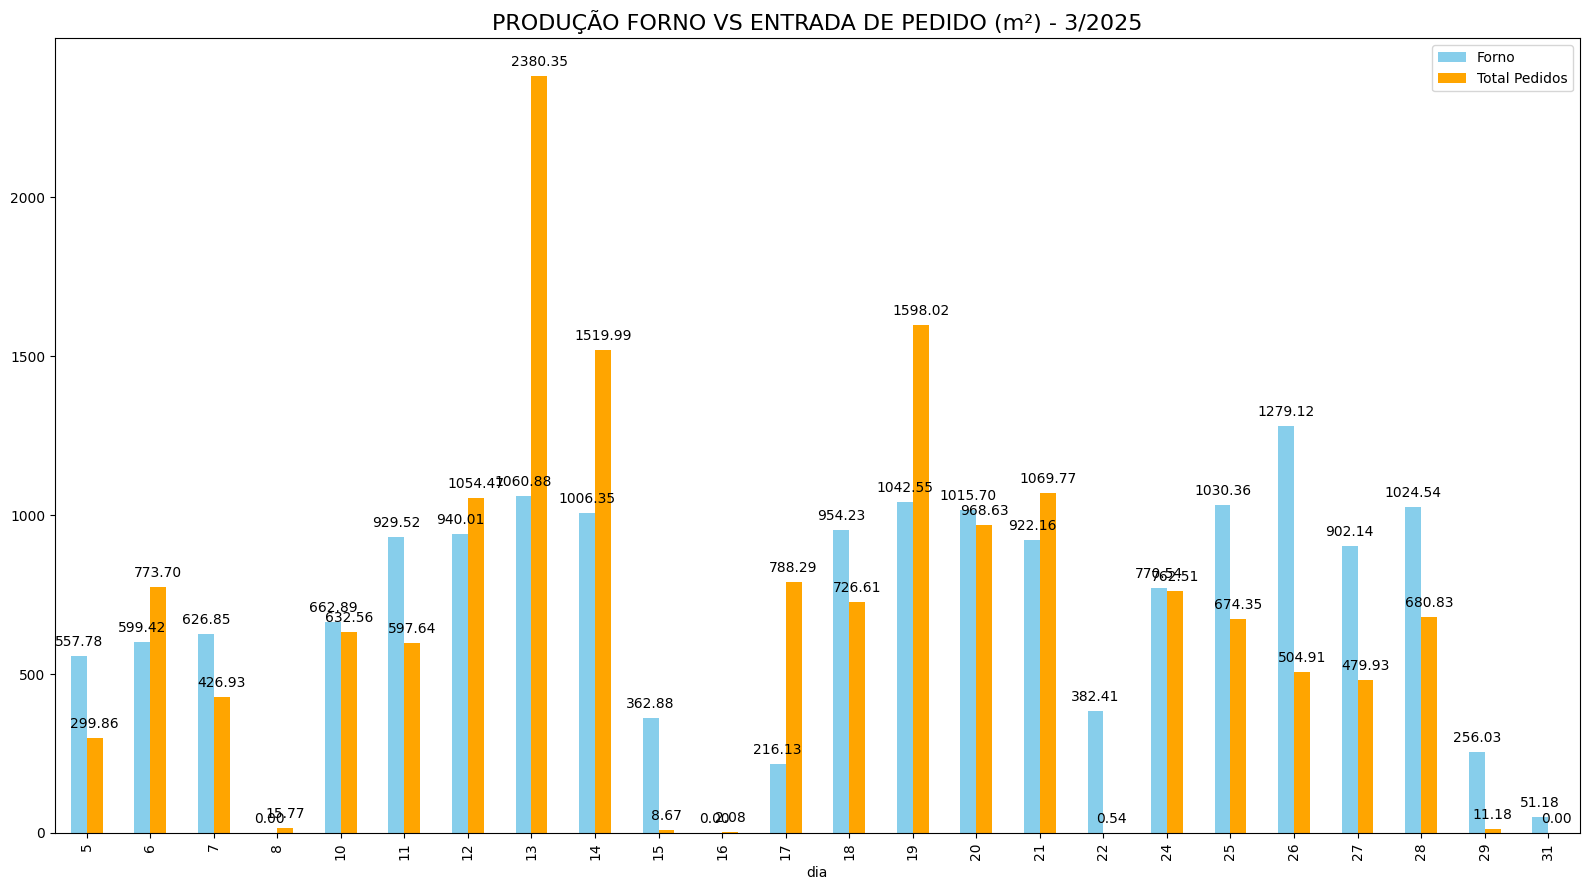

In [17]:
df_resumo_total02['dia'] = df_resumo_total02['Data'].dt.day
df_resumo_total02['mes'] = df_resumo_total02['Data'].dt.month
df_resumo_total02['ano'] = df_resumo_total02['Data'].dt.year
    
fig01, ax = plt.subplots(figsize=(16,9))

df_filtro_forno = df_resumo_total02[(df_resumo_total02['mes']== mes)& (df_resumo_total02['ano'] == ano)]
df_filtro_forno.plot(x='dia', y=['Forno', 'Total Pedidos'], kind='bar', color=['skyblue', 'orange'], ax=ax)

plt.title(f'PRODUÇÃO FORNO VS ENTRADA DE PEDIDO (m²) - {mes}/{ano}', fontsize=16)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',  # Texto (valor da barra)
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Posição (x, y)
        ha='center',  # Alinhamento horizontal
        va='bottom',  # Alinhamento vertical
        fontsize=10,  # Tamanho da fonte
        color='black',  # Cor do texto
        xytext=(0, 5),  # Deslocamento do texto em relação à posição
        textcoords='offset points'  # Sistema de coordenadas do deslocamento
    )


plt.tight_layout()
plt.show()


In [8]:
mes = 3
ano = 2025

df_prod_concluido = df_concluido[['dia_n', 'mes_n', 'ano_n', 'tipo_servico', 'Pedido Área']]
prod_dia_filtro = df_prod_concluido[(df_prod_concluido['mes_n']== mes) & (df_prod_concluido['ano_n']== ano)]
df_prod_dia = prod_dia_filtro.groupby('mes_n')['Pedido Área'].sum().reset_index()


In [9]:
total = df_prod_dia['Pedido Área'].iloc[0]
total

15840.05